# Task HSV Disk

Develop the code that generates the image of an HSV disk of size $500\times 500$, as shown below.

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
imfile = '../Imagens/hsv_disk.png'
hsv_disk = cv2.imread(imfile)

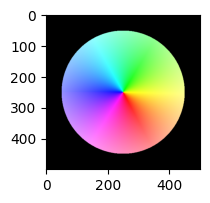

In [3]:
plt.figure(figsize=(2, 2))
plt.imshow(hsv_disk)

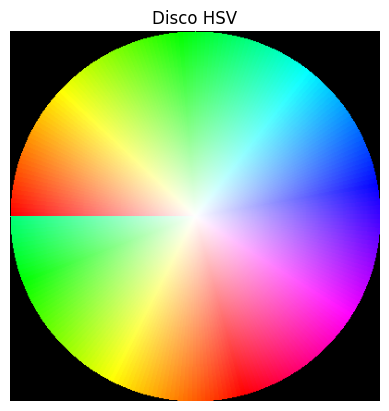

In [6]:
#Gerando um disco hsv com numpy, matplotlib e cv2
def generate_hsv_disk(radius):
    # Dimensões da imagem
    height = width = radius * 2

    # Criar matriz de zeros para as componentes HSV
    hsv_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Coordenadas do centro do círculo
    center = (radius, radius)

    # Calcular valores de H, S e V para cada pixel
    for y in range(height):
        for x in range(width):
            # Coordenadas do pixel atual
            pixel = (x, y)

            # Calcular a distância do pixel ao centro
            distance = np.linalg.norm(np.array(pixel) - np.array(center))

            # Se o pixel estiver dentro do raio do círculo
            if distance <= radius:
                # Calcular o ângulo (Hue) com base na posição do pixel
                hue = (np.arctan2(y - center[1], x - center[0]) + np.pi) / (2 * np.pi)

                # Ajustar o valor de S e V para fazer um gradiente suave
                saturation = distance / radius
                value = 1.0

                # Converter H, S, V para o formato HSV (0-255)
                hsv_color = np.array([hue * 255, saturation * 255, value * 255], dtype=np.uint8)

                # Definir o pixel na imagem HSV
                hsv_image[y, x] = hsv_color

    return hsv_image

# Definir o raio do disco HSV
radius = 200

# Gerar o disco HSV
hsv_disk = generate_hsv_disk(radius)

# Converter a imagem HSV para RGB para exibição
rgb_disk = cv2.cvtColor(hsv_disk, cv2.COLOR_HSV2RGB)

# Exibir a imagem usando matplotlib
plt.imshow(rgb_disk)
plt.axis('off')
plt.title('Disco HSV')
plt.show()
